<a href="https://colab.research.google.com/github/jumafernandez/imbalanced_data/blob/main/notebooks/visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis visual de estrategias de Oversampling

__Autor:__ Juan Manuel Fernandez

__Objetivo:__ En esta notebook se visualizan las estrategias más conocidas de over-sampling para el remuestreo de datasets a partir de la generación sintética de ejemplos en las clases minoritarias.

## Instalación y Carga de librerías y funciones útiles

### Instalación de librerías

Se instalan las librerías que no están en el entorno de Google Colab

In [1]:
# Se instala gensim que es el que tiene el modelo Word2Vec
!pip install requests
!pip install wget
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


### Funciones útiles

Se cargan funciones útiles desde el repo https://github.com/jumafernandez/clasificacion_correos.

In [2]:
import requests

# Se hace el request del raw del script python
url = 'https://raw.githubusercontent.com/jumafernandez/clasificacion_correos/main/tesis/scripts/supervisado/funciones_preprocesamiento.py'
r = requests.get(url)

# Se guarda en el working directory
with open('funciones_preprocesamiento.py', 'w') as f:
    f.write(r.text)

# Se importan las funciones a utilizar
from funciones_preprocesamiento import preprocesar_correos

### Carga de datos

Se carga el dataframe en memoria con el preprocesamiento de los datos:

In [3]:
import warnings
from os import path
import numpy as np
import pandas as pd
warnings.filterwarnings("ignore")

# Constantes con los datos
DS_DIR = 'https://raw.githubusercontent.com/jumafernandez/clasificacion_correos/main/tesis/data/'
TRAIN_FILE = '02-01-correos-train-80.csv'
TEST_FILE = '02-02-correos-test-20.csv'

# Chequeo sobre si los archivos están en el working directory
if not(path.exists(TRAIN_FILE)):
  # Genero el enlace completo
  URL_file_train = DS_DIR + TRAIN_FILE
  URL_file_test = DS_DIR + TEST_FILE
  # Descargo los archivos
  import wget
  wget.download(URL_file_train)
  wget.download(URL_file_test)
  
# Leemos el archivo en un dataframe
df_train = pd.read_csv(TRAIN_FILE)
df_test = pd.read_csv(TEST_FILE)

# Se ejecuta el preprocesamiento de correos sobre el campo consulta de train y test
import pandas as pd
consultas_train = list(preprocesar_correos(df_train['consulta']))
consultas_test = list(preprocesar_correos(df_test['consulta']))

print(f"\nEl conjunto de entrenamiento tiene la dimensión: {len(consultas_train)}.")
print(f"El conjunto de testeo tiene la dimensión: {len(consultas_test)}.")

# Convierto a una lista las clases
y_train = list(df_train['clase'])
y_test = list(df_test['clase'])

# Me guardo las distintas clases en una lista ordenada
etiquetas = list(set(y_test))
etiquetas.sort()
np.array(etiquetas)


El conjunto de entrenamiento tiene la dimensión: 800.
El conjunto de testeo tiene la dimensión: 200.


array(['Boleto Universitario', 'Cambio de Carrera', 'Cambio de Comisión',
       'Consulta por Equivalencias', 'Consulta por Legajo',
       'Consulta sobre Título Universitario', 'Cursadas',
       'Datos Personales', 'Exámenes', 'Ingreso a la Universidad',
       'Pedido de Certificados', 'Problemas con la Clave',
       'Reincorporación', 'Requisitos de Ingreso',
       'Simultaneidad de Carreras', 'Situación Académica'], dtype='<U35')

### Estrategia de representación de la consulta

A continuación se representa la consulta a partir de features.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3,4), token_pattern = '[\w\/\%]+')

X_train = vectorizer.fit_transform(consultas_train)
X_test = vectorizer.transform(consultas_test)     

# Esta función va dentro de un iterador entre las 5 estrategias   
estrategia = '3-4-NGRAM-CHARS' 
print('Estrategia de representación: {}' . format(estrategia))

Estrategia de representación: 3-4-NGRAM-CHARS


## Estrategias de Over-sampling

Se trabaja con las estrategias de over-sampling. Estas estrategias se almacenan en 3 listas para luego iterar en la visualización: una para las X, otra para las y y otra para el nombre de la estrategia.

In [5]:
X_list = []
y_list = []
estrategia_list = []

### Conjunto de datos original

Incorporamos como primer dataset al conjunto de datos original.

In [6]:
# Actualizo las listas
X_list.append(X_train)
y_list.append(y_train)
estrategia_list.append('Original')

### Sobremuestreo aleatorio ingenuo (RandomOverSampler)

Una forma de combatir este problema es generar nuevas muestras en las clases que están subrepresentadas. La estrategia más ingenua es generar nuevas muestras mediante muestreo aleatorio con reemplazo de las muestras disponibles actualmente.

In [7]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train, y_train)

# Actualizo las listas
X_list.append(X_resampled_ros)
y_list.append(y_resampled_ros)
estrategia_list.append('RandomOverSampler')

In [8]:
import numpy as np

unique, counts = np.unique(y_resampled_ros, return_counts=True)

np.asarray((unique, counts)).T

array([['Boleto Universitario', '193'],
       ['Cambio de Carrera', '193'],
       ['Cambio de Comisión', '193'],
       ['Consulta por Equivalencias', '193'],
       ['Consulta por Legajo', '193'],
       ['Consulta sobre Título Universitario', '193'],
       ['Cursadas', '193'],
       ['Datos Personales', '193'],
       ['Exámenes', '193'],
       ['Ingreso a la Universidad', '193'],
       ['Pedido de Certificados', '193'],
       ['Problemas con la Clave', '193'],
       ['Reincorporación', '193'],
       ['Requisitos de Ingreso', '193'],
       ['Simultaneidad de Carreras', '193'],
       ['Situación Académica', '193']], dtype='<U35')

### SMOTE

Hay una serie de métodos disponibles para sobremuestrear un conjunto de datos utilizado en un problema de clasificación típico, siendo el más utilizado SMOTE.

In [9]:
from imblearn.over_sampling import SMOTE

X_resampled_smote, y_resampled_smote = SMOTE().fit_resample(X_train, y_train)

# Actualizo las listas
X_list.append(X_resampled_smote)
y_list.append(y_resampled_smote)
estrategia_list.append('SMOTE')

In [10]:
import numpy as np

unique, counts = np.unique(y_resampled_smote, return_counts=True)

np.asarray((unique, counts)).T

array([['Boleto Universitario', '193'],
       ['Cambio de Carrera', '193'],
       ['Cambio de Comisión', '193'],
       ['Consulta por Equivalencias', '193'],
       ['Consulta por Legajo', '193'],
       ['Consulta sobre Título Universitario', '193'],
       ['Cursadas', '193'],
       ['Datos Personales', '193'],
       ['Exámenes', '193'],
       ['Ingreso a la Universidad', '193'],
       ['Pedido de Certificados', '193'],
       ['Problemas con la Clave', '193'],
       ['Reincorporación', '193'],
       ['Requisitos de Ingreso', '193'],
       ['Simultaneidad de Carreras', '193'],
       ['Situación Académica', '193']], dtype='<U35')

### ADASYN

Hay una serie de métodos disponibles para sobremuestrear un conjunto de datos utilizado en un problema de clasificación típico, siendo el más utilizado SMOTE.

In [11]:
from imblearn.over_sampling import ADASYN

X_resampled_adasyn, y_resampled_adasyn = ADASYN().fit_resample(X_train, y_train)

# Actualizo las listas
X_list.append(X_resampled_adasyn)
y_list.append(y_resampled_adasyn)
estrategia_list.append('ADASYN')

In [12]:
import numpy as np

unique, counts = np.unique(y_resampled_adasyn, return_counts=True)

np.asarray((unique, counts)).T

array([['Boleto Universitario', '193'],
       ['Cambio de Carrera', '194'],
       ['Cambio de Comisión', '193'],
       ['Consulta por Equivalencias', '194'],
       ['Consulta por Legajo', '193'],
       ['Consulta sobre Título Universitario', '193'],
       ['Cursadas', '182'],
       ['Datos Personales', '192'],
       ['Exámenes', '193'],
       ['Ingreso a la Universidad', '177'],
       ['Pedido de Certificados', '194'],
       ['Problemas con la Clave', '184'],
       ['Reincorporación', '198'],
       ['Requisitos de Ingreso', '197'],
       ['Simultaneidad de Carreras', '191'],
       ['Situación Académica', '188']], dtype='<U35')

### BorderlineSMOTE

In [13]:
from imblearn.over_sampling import BorderlineSMOTE

X_resampled_border, y_resampled_border = BorderlineSMOTE().fit_resample(X_train, y_train)

# Actualizo las listas
X_list.append(X_resampled_border)
y_list.append(y_resampled_border)
estrategia_list.append('BorderlineSMOTE')

In [14]:
import numpy as np

unique, counts = np.unique(y_resampled_border, return_counts=True)

np.asarray((unique, counts)).T

array([['Boleto Universitario', '193'],
       ['Cambio de Carrera', '193'],
       ['Cambio de Comisión', '193'],
       ['Consulta por Equivalencias', '193'],
       ['Consulta por Legajo', '193'],
       ['Consulta sobre Título Universitario', '193'],
       ['Cursadas', '193'],
       ['Datos Personales', '6'],
       ['Exámenes', '193'],
       ['Ingreso a la Universidad', '193'],
       ['Pedido de Certificados', '193'],
       ['Problemas con la Clave', '193'],
       ['Reincorporación', '193'],
       ['Requisitos de Ingreso', '193'],
       ['Simultaneidad de Carreras', '193'],
       ['Situación Académica', '193']], dtype='<U35')

## Exploración visual de datos

Se exploran visualmente los datasets resultantes del balanceo de clases.

Se cargan las librerías:

In [15]:
import matplotlib.pyplot as plt
#from sklearn.datasets import make_classification
#import numpy as np

#import seaborn as sns
#sns.set_context("poster")

Se eligen los datos a graficar:

In [16]:
# Alternativas:  0-Original, 
#                1-RandomOverSampler, 
#                2-SMOTE, 
#                3-ADASYN, 
#                4-BorderlineSMOTE

ESTRATEGIA = 'SMOTE'

if ESTRATEGIA=='Original':
  X_aux = X_list[0]
  y_aux = y_list[0]
elif ESTRATEGIA=='RandomOverSampler':
  X_aux = X_list[1]
  y_aux = y_list[1]
elif ESTRATEGIA=='SMOTE':
  X_aux = X_list[2]
  y_aux = y_list[2]
elif ESTRATEGIA=='ADASYN':
  X_aux = X_list[3]
  y_aux = y_list[3]
elif ESTRATEGIA=='BorderlineSMOTE':
  X_aux = X_list[4]
  y_aux = y_list[4]


Cargo en memoria las librerías de dibujo y para PCA:

In [17]:
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import category_scatter

Estrategia Original
Estrategia RandomOverSampler
Estrategia SMOTE
Estrategia ADASYN
Estrategia BorderlineSMOTE


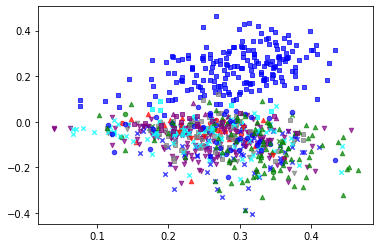

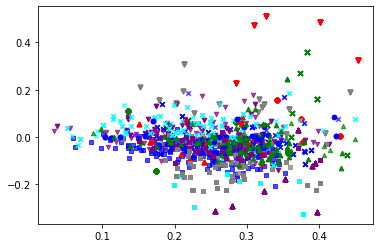

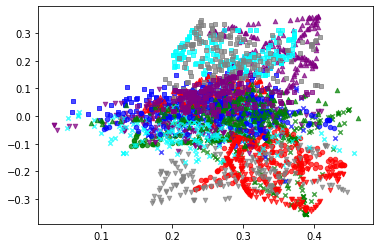

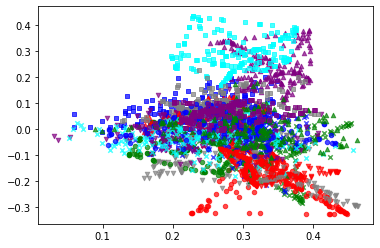

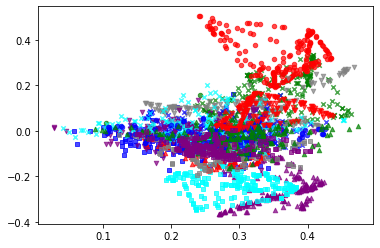

In [18]:
# Itero en todas las estrategias y grafico
for i in range(len(estrategia_list)):

  # Defino la estrategia y la pongo en las variables de trabajo
  X_aux = X_list[i]
  y_aux = y_list[i]
  print(f'Estrategia {estrategia_list[i]}')

  # Inicializo el "PCA" y entreno las X's
  PCA = TruncatedSVD(n_components=2)
  X = PCA.fit_transform(X_aux)
  X_test_PCA = PCA.transform(X_test) 
  y = y_aux

  # Paso los datos a un df con las coordenadas del punto y la clase (para colorear)
  df = pd.DataFrame(X, columns=['X', 'Y'])
  df['Clase'] = y

  # Defino el gráfico
  figura = category_scatter(x='X', y='Y', label_col='Clase', data=df, legend_loc=None)
  figura.show()

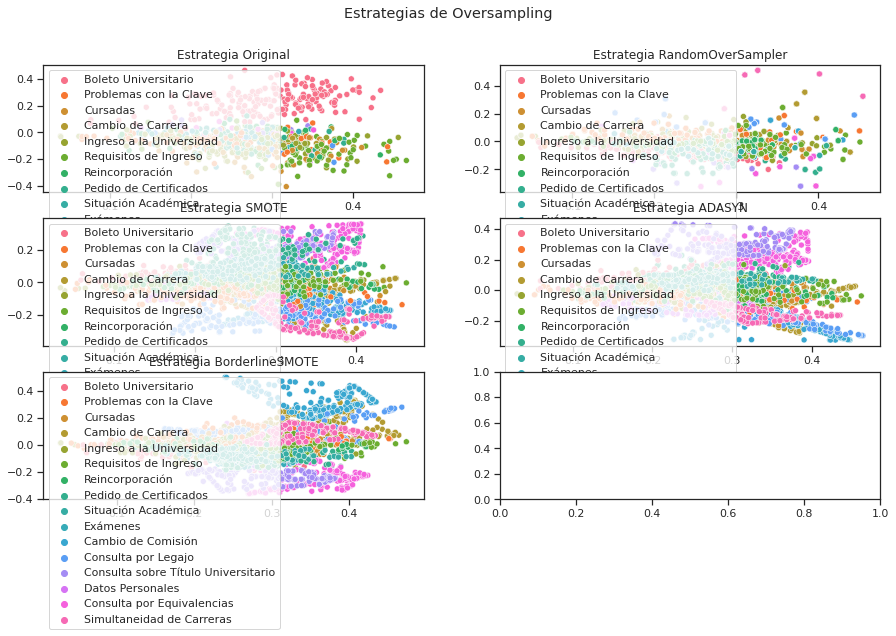

In [27]:
import seaborn as sns
sns.set() # Setting seaborn as default style even if use only matplotlib
sns.set_theme(style="ticks")

fig, axes = plt.subplots(3, 2, figsize=(15, 8))
fig.suptitle('Estrategias de Oversampling')

# Itero en todas las estrategias y grafico
for i in range(len(estrategia_list)):

  # Defino la estrategia y la pongo en las variables de trabajo
  X_aux = X_list[i]
  y_aux = y_list[i]

  # Inicializo el "PCA" y entreno las X's
  PCA = TruncatedSVD(n_components=2)
  X = PCA.fit_transform(X_aux)
  X_test_PCA = PCA.transform(X_test) 
  y = y_aux

  # Paso los datos a un df con las coordenadas del punto y la clase (para colorear)
  df = pd.DataFrame(X, columns=['X', 'Y'])
  df['Clase'] = y

  # Juego con los ejes
  if i<2:
    ejeX = 0
  elif i<4:
    ejeX = 1
  else:
    ejeX = 2
  
  # Grafico las estrategias
  sns.scatterplot(ax=axes[ejeX, i%2], 
                  x=df.X.values, 
                  y=df.Y.values, 
                  hue=df.Clase.values)
  axes[ejeX, i%2].set_title(f'Estrategia {estrategia_list[i]}')


# Referencias
- imbalanced-learn documentation https://imbalanced-learn.org/
- sklearn.model_selection.GridSearchCV https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- ML Pipelines using scikit-learn and GridSearchCV https://medium.com/analytics-vidhya/ml-pipelines-using-scikit-learn-and-gridsearchcv-fe605a7f9e05

In [20]:
#X = X_resampled_border

#from sklearn import preprocessing

#le = preprocessing.LabelEncoder()
#le.fit(y = y_resampled_border)
#y = le.transform(y = y_resampled_border)

In [21]:
#from imblearn.pipeline import make_pipeline
#from imblearn.over_sampling import RandomOverSampler, SMOTE
#
#fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
#
#plot_decision_function(X, y, clf, axs[0], title="Without resampling")
#
#sampler = SMOTE(random_state=0)
#model = make_pipeline(sampler, clf).fit(X, y)
#plot_decision_function(X, y, model, axs[1], f"Using {model[0].__class__.__name__}")
#
#fig.suptitle(f"Decision function of {clf.__class__.__name__}")
#
#fig.tight_layout()

In [22]:
#def plot_decision_function(X, y, clf, ax, title=None):
#    plot_step = 0.02
#    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#    xx, yy = np.meshgrid(
#        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
#    )

#    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#    Z = Z.reshape(xx.shape)
#    ax.contourf(xx, yy, Z, alpha=0.4)
#    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor="k")
#    if title is not None:
#        ax.set_title(title)